## Define the DATA's Outlier and EDA
#### 해당 파일은 AllConsider.ipynb 파일의 결과물을 토대로 함.

---

- Data Preprocessing
  1. Change the column `'계약날짜'` to `type of datetime`
  2. Column `'계약구분'` processing
    - how can process the chr value: `"-" `

---
- Data EDA
  1. Define Outliner of numeric columns
      - Check the EDA
        - Histogram
        - Distribution
        - BoxPlot
        - ScatterPlot
      - Check the statistic summary
        - std
        - mean
      
    ---

  2. Save processed data
    - File: Rent_lease.csv
    
    ---

  3. Check the outlier by IQR
    - IQR is can't tell the outlier

#### 데이터 로드 및 필요 패키지 설치

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [3]:

# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.8 MB/s eta 0:00:00


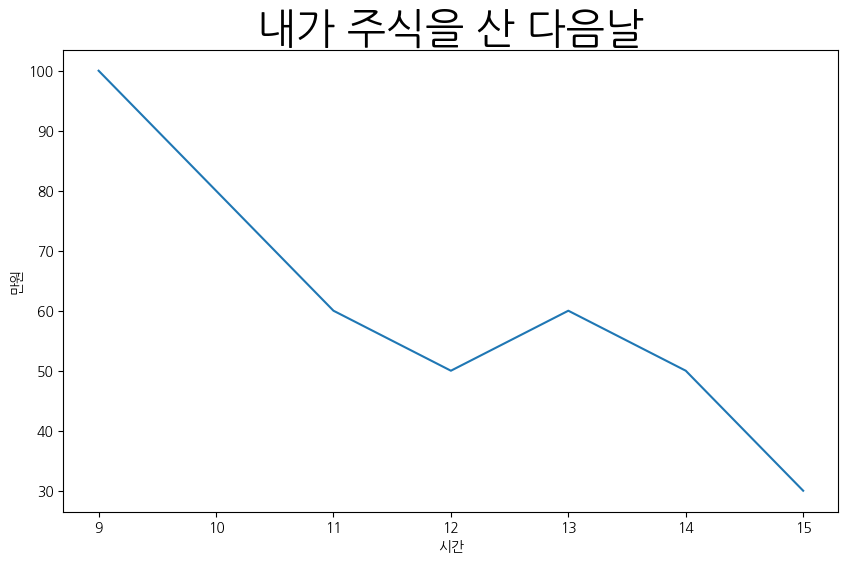

In [6]:
import koreanize_matplotlib
a = [1,2,3,4,5,6,7,8,9,10]
b = np.random.rand(10)
plt.figure(figsize=(10, 6))
plt.plot([9, 10, 11, 12, 13, 14, 15], [100, 80, 60, 50, 60, 50, 30])
plt.title('내가 주식을 산 다음날', size=30)
plt.xlabel('시간')
plt.ylabel('만원')
plt.show()

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/2_After_preprocessing.csv')


In [9]:
df = df.drop(columns = ['Unnamed: 0'])

In [10]:
df.head()

,단지명,전월세구분,전용면적(㎡),보증금(만원),월세금(만원),층,건축년도,계약구분,갱신요구권 사용,종전계약 보증금(만원),...,동,계약날짜,계약연도,계약월,계약요일,IMF_경과년수,금융위기_경과년수,계약개월수,단지별 평균 보증금,단지별 평균 월세금
0,청호 서울숲 뜨레피움 오피스텔,전세,19.03,18000.0,0.0,3,2018.0,-,0,-1.0,...,성수동1가,2019-04-30,2019,4,1,21.424658,10.627397,24,18545.588235,0.00000
1,더클래스,전세,43.17,23000.0,0.0,4,2019.0,-,0,-1.0,...,불광동,2019-04-30,2019,4,1,21.424658,10.627397,24,22627.794118,0.00000
2,화양타워,전세,37.34,11000.0,0.0,4,1999.0,-,0,-1.0,...,화양동,2019-04-30,2019,4,1,21.424658,10.627397,24,18908.888889,0.00000
3,효성네오인텔리안,월세,31.71,1000.0,50.0,4,2005.0,-,0,-1.0,...,번동,2019-04-30,2019,4,1,21.424658,10.627397,24,655.172414,57.37931
4,한강현대하이엘,전세,40.28,21000.0,0.0,15,2005.0,-,0,-1.0,...,한강로2가,2019-04-30,2019,4,1,21.424658,10.627397,24,21936.083333,0.00000


In [11]:
df.shape

(1750353, 26)

### Data Preprocessing

#### 계약날짜 데이터 타입 변환 Object -> Datetime

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750353 entries, 0 to 1750352
Data columns (total 26 columns):
 #   Column        Dtype  
---  ------        -----  
 0   단지명           object 
 1   전월세구분         object 
 2   전용면적(㎡)       float64
 3   보증금(만원)       float64
 4   월세금(만원)       float64
 5   층             int64  
 6   건축년도          float64
 7   계약구분          object 
 8   갱신요구권 사용      int64  
 9   종전계약 보증금(만원)  float64
 10  종전계약 월세(만원)   float64
 11  주택유형          object 
 12  index         float64
 13  rate          float64
 14  pp_rate       float64
 15  전체주소          object 
 16  동             object 
 17  계약날짜          object 
 18  계약연도          int64  
 19  계약월           int64  
 20  계약요일          int64  
 21  IMF_경과년수      float64
 22  금융위기_경과년수     float64
 23  계약개월수         int64  
 24  단지별 평균 보증금    float64
 25  단지별 평균 월세금    float64
dtypes: float64(13), int64(6), object(7)
memory usage: 347.2+ MB


In [13]:
df['계약날짜'] = pd.to_datetime(df['계약날짜'], format="%Y-%m-%d")

In [14]:
df["계약날짜"]

,계약날짜
0,2019-04-30
1,2019-04-30
2,2019-04-30
3,2019-04-30
4,2019-04-30
...,...
1750348,2024-05-01
1750349,2024-05-01
1750350,2024-10-29
1750351,2024-10-22


#### 계약구분 `"-" `

In [15]:
df["계약구분"].value_counts()

,count
계약구분,
-,818800
신규,642504
갱신,289049


In [16]:
# 데이터의 48% 가량 계약구분 알 수 없음
def categorize_contract(row):
    if row['계약구분'] in ['신규', '갱신']:
        return row['계약구분']  # 기존 값 유지
    elif row['갱신요구권 사용'] == 1 or row['종전계약 보증금(만원)'] > 0:
        return '갱신'  # 종전 계약이 있거나 갱신요구권을 사용했다면 갱신 계약
    else:
        return '신규'  # 갱신요구권을 사용하지 않았고, 종전계약이 없으면 신규 계약

df['계약구분_보완'] = df.apply(categorize_contract, axis=1)
df['계약구분_보완'].value_counts()

,count
계약구분_보완,
신규,1461304
갱신,289049


In [17]:
df= df.drop(columns=['계약구분'])
df

,단지명,전월세구분,전용면적(㎡),보증금(만원),월세금(만원),층,건축년도,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),...,계약날짜,계약연도,계약월,계약요일,IMF_경과년수,금융위기_경과년수,계약개월수,단지별 평균 보증금,단지별 평균 월세금,계약구분_보완
0,청호 서울숲 뜨레피움 오피스텔,전세,19.03,18000.0,0.0,3,2018.0,0,-1.0,-1.0,...,2019-04-30,2019,4,1,21.424658,10.627397,24,18545.588235,0.000000,신규
1,더클래스,전세,43.17,23000.0,0.0,4,2019.0,0,-1.0,-1.0,...,2019-04-30,2019,4,1,21.424658,10.627397,24,22627.794118,0.000000,신규
2,화양타워,전세,37.34,11000.0,0.0,4,1999.0,0,-1.0,-1.0,...,2019-04-30,2019,4,1,21.424658,10.627397,24,18908.888889,0.000000,신규
3,효성네오인텔리안,월세,31.71,1000.0,50.0,4,2005.0,0,-1.0,-1.0,...,2019-04-30,2019,4,1,21.424658,10.627397,24,655.172414,57.379310,신규
4,한강현대하이엘,전세,40.28,21000.0,0.0,15,2005.0,0,-1.0,-1.0,...,2019-04-30,2019,4,1,21.424658,10.627397,24,21936.083333,0.000000,신규
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750348,우성아파트,월세,131.08,60000.0,110.0,8,1981.0,1,60000.0,170.0,...,2024-05-01,2024,5,2,26.432877,15.635616,24,34131.420534,115.344585,갱신
1750349,리센츠,월세,27.68,3000.0,160.0,9,2008.0,0,-1.0,-1.0,...,2024-05-01,2024,5,2,26.432877,15.635616,24,40770.059032,163.527155,신규
1750350,잠실라펜앤,월세,44.09,40000.0,30.0,2,2024.0,0,-1.0,-1.0,...,2024-10-29,2024,10,1,26.928767,16.131507,24,40000.000000,30.000000,신규
1750351,잠실라펜앤,전세,29.96,35000.0,0.0,2,2024.0,0,-1.0,-1.0,...,2024-10-22,2024,10,1,26.909589,16.112329,24,35000.000000,0.000000,신규


In [19]:
# Add the dummy variable
df['is_new_contract'] = (df['계약구분_보완'] == '신규').astype(int)
df['is_renewal'] = (df['계약구분_보완'] == '갱신').astype(int)


In [20]:
# Dfference between new contract and last contract
df['보증금 변화'] = df.apply(lambda row: abs(row['보증금(만원)'] - row['종전계약 보증금(만원)']) if row['종전계약 보증금(만원)'] != -1 else -1, axis=1)

df['월세 변화'] = df.apply(lambda row: abs(row['월세금(만원)'] - row['종전계약 월세(만원)']) if row['종전계약 월세(만원)'] != -1 else -1, axis=1)



In [25]:
df['종전계약_유무'] = ((df['종전계약 보증금(만원)'] != -1) | (df["종전계약 월세(만원)"] != -1)).astype(int)


In [26]:
df

,단지명,전월세구분,전용면적(㎡),보증금(만원),월세금(만원),층,건축년도,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),...,금융위기_경과년수,계약개월수,단지별 평균 보증금,단지별 평균 월세금,계약구분_보완,is_new_contract,is_renewal,보증금 변화,월세 변화,종전계약_유무
0,청호 서울숲 뜨레피움 오피스텔,전세,19.03,18000.0,0.0,3,2018.0,0,-1.0,-1.0,...,10.627397,24,18545.588235,0.000000,신규,1,0,-1.0,-1.0,0
1,더클래스,전세,43.17,23000.0,0.0,4,2019.0,0,-1.0,-1.0,...,10.627397,24,22627.794118,0.000000,신규,1,0,-1.0,-1.0,0
2,화양타워,전세,37.34,11000.0,0.0,4,1999.0,0,-1.0,-1.0,...,10.627397,24,18908.888889,0.000000,신규,1,0,-1.0,-1.0,0
3,효성네오인텔리안,월세,31.71,1000.0,50.0,4,2005.0,0,-1.0,-1.0,...,10.627397,24,655.172414,57.379310,신규,1,0,-1.0,-1.0,0
4,한강현대하이엘,전세,40.28,21000.0,0.0,15,2005.0,0,-1.0,-1.0,...,10.627397,24,21936.083333,0.000000,신규,1,0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750348,우성아파트,월세,131.08,60000.0,110.0,8,1981.0,1,60000.0,170.0,...,15.635616,24,34131.420534,115.344585,갱신,0,1,0.0,60.0,1
1750349,리센츠,월세,27.68,3000.0,160.0,9,2008.0,0,-1.0,-1.0,...,15.635616,24,40770.059032,163.527155,신규,1,0,-1.0,-1.0,0
1750350,잠실라펜앤,월세,44.09,40000.0,30.0,2,2024.0,0,-1.0,-1.0,...,16.131507,24,40000.000000,30.000000,신규,1,0,-1.0,-1.0,0
1750351,잠실라펜앤,전세,29.96,35000.0,0.0,2,2024.0,0,-1.0,-1.0,...,16.112329,24,35000.000000,0.000000,신규,1,0,-1.0,-1.0,0


In [ ]:
### 디버깅 오류 의도
ㅁ

### DATA EDA

### 1. Define Outliner of numeric columns
  - Check the EDA  with Statistic Summary
    - Hitmap - correlation
    - ScatterPlot - correlation
    - Distribution - Histogram
    - BoxPlot - outlier
    
    ---
  시간 남으면 time series


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750353 entries, 0 to 1750352
Data columns (total 31 columns):
 #   Column           Dtype         
---  ------           -----         
 0   단지명              object        
 1   전월세구분            object        
 2   전용면적(㎡)          float64       
 3   보증금(만원)          float64       
 4   월세금(만원)          float64       
 5   층                int64         
 6   건축년도             float64       
 7   갱신요구권 사용         int64         
 8   종전계약 보증금(만원)     float64       
 9   종전계약 월세(만원)      float64       
 10  주택유형             object        
 11  index            float64       
 12  rate             float64       
 13  pp_rate          float64       
 14  전체주소             object        
 15  동                object        
 16  계약날짜             datetime64[ns]
 17  계약연도             int64         
 18  계약월              int64         
 19  계약요일             int64         
 20  IMF_경과년수         float64       
 21  금융위기_경과년수        float64       

In [28]:
obj = df.dtypes == object
object_columns = list(df.columns[obj])


date = df.dtypes == 'datetime64[ns]'
date_columns = list(df.columns[date])

numeric = list(df.columns[(df.dtypes != 'object') & (df.dtypes != 'datetime64[ns]')])

print(f"numeric: {numeric},\n object: {object_columns},\n date: {date_columns}")


numeric: ['전용면적(㎡)', '보증금(만원)', '월세금(만원)', '층', '건축년도', '갱신요구권 사용', '종전계약 보증금(만원)', '종전계약 월세(만원)', 'index', 'rate', 'pp_rate', '계약연도', '계약월', '계약요일', 'IMF_경과년수', '금융위기_경과년수', '계약개월수', '단지별 평균 보증금', '단지별 평균 월세금', 'is_new_contract', 'is_renewal', '보증금 변화', '월세 변화', '종전계약_유무'],
 object: ['단지명', '전월세구분', '주택유형', '전체주소', '동', '계약구분_보완'],
 date: ['계약날짜']


In [29]:
df['계약연도']

,계약연도
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
1750348,2024
1750349,2024
1750350,2024
1750351,2024


##### 함수 정의
1. 히트맵
  - df: DataFrame of pandas
  - numeric_columns: 수치형만 포함된 컬럼이름
  - is_rent: 월세와 전세 여부(월세:1, 전세:0)
  - housing_type: 주택유형(아파트, 오피스텔, 다연립세대)

2. 산점도
  - df
  - numeric_colums
  - area: 단지명 str
  - housing_type: 주택유형

3. 분산 행렬과 박스플롯을 그리는 함수
  - df: pandas DataFrame
  - numeric_columns: 수치형 데이터 컬럼 목록
  - housing_type: 분석할 주택유형 (기본값은 None으로 전체 데이터 분석)

In [30]:
def distribution_plot(df, numeric_columns, housing_type=None):
    """
    전세/월세별 수치형 변수의 분포를 선 그래프로 시각화하는 함수
    df: pandas DataFrame
    numeric_columns: 수치형 데이터 컬럼 목록
    housing_type: 분석할 주택유형 (기본값은 None으로 전체 데이터 분석)
    """
    # 전세와 월세 구분
    rent_df = df[df['is_rent'] == 1]  # 월세
    lease_df = df[df['is_rent'] == 0]  # 전세

    # 주택 유형별 필터링
    if housing_type:
        rent_df = rent_df[rent_df['주택유형'] == housing_type]
        lease_df = lease_df[lease_df['주택유형'] == housing_type]

    plt.figure(figsize=(12, len(numeric_columns) * 3))  # 가변적인 크기 설정

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(len(numeric_columns), 1, i)  # 여러 개의 그래프 배치

        # 전세 (파란색) - 선 그래프
        sns.kdeplot(lease_df[col], label=f"전세 {col}", color='blue', linewidth=2)

        # 월세 (빨간색) - 선 그래프
        sns.kdeplot(rent_df[col], label=f"월세 {col}", color='red', linewidth=2)

        plt.title(f"{col} 분포 ({housing_type if housing_type else '전체'})")
        plt.legend()

    plt.tight_layout()
    plt.show()

In [31]:
# EDA 코드

def distribution_plot(df, numeric_columns, housing_type=None):
    """
    전세/월세별 수치형 변수의 분포를 선 그래프로 시각화하는 함수
    df: pandas DataFrame
    numeric_columns: 수치형 데이터 컬럼 목록
    housing_type: 분석할 주택유형 (기본값은 None으로 전체 데이터 분석)
    """
    # 전세와 월세 구분
    rent_df = df[df['is_rent'] == 1]  # 월세
    lease_df = df[df['is_rent'] == 0]  # 전세

    # 주택 유형별 필터링
    if housing_type:
        rent_df = rent_df[rent_df['주택유형'] == housing_type]
        lease_df = lease_df[lease_df['주택유형'] == housing_type]

    plt.figure(figsize=(12, len(numeric_columns) * 3))  # 가변적인 크기 설정

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(len(numeric_columns), 1, i)  # 여러 개의 그래프 배치

        # 전세 (파란색) - 선 그래프
        sns.kdeplot(lease_df[col], label=f"전세 {col}", color='blue', linewidth=2)

        # 월세 (빨간색) - 선 그래프
        sns.kdeplot(rent_df[col], label=f"월세 {col}", color='red', linewidth=2)

        plt.title(f"{col} 분포 ({housing_type if housing_type else '전체'})")
        plt.legend()

    plt.tight_layout()
    plt.savefig(f"Distribution_{housing_type}.png", dpi=300, bbox_inches='tight')
    plt.show()

# 3. 히트맵 (상관행렬)
def heat_map(df, numeric_columns, is_rent=1, housing_type=None):
    """
    df param: pandas DataFrame
    numeric_columns param: list of numeric columns
    is_rent param: 월세 여부 (1이면 월세, 0이면 전세)
    housing_type param: 주택유형 (None이면 전체)
    """
    # 월세유무와 주택유형을 인자로 받아 필터링

    if housing_type:
        df = df[df['주택유형'] == housing_type]
    rent = ['월세', '전세']
    if is_rent == 1:
        df = df[df['is_rent'] == 1]
        rent = rent[0]
    elif is_rent == 0:
        df = df[df['is_rent'] == 0]
        rent = rent[1]

    corr_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{housing_type}-{rent}상관행렬 히트맵')

    plt.savefig(f"{rent}-{housing_type}_ScatterMatrix.png", dpi=300, bbox_inches='tight')
    plt.show()

# 산점도 행렬
def scatter_plot(df, numeric_columns, area = None, housing_type=None):
    """
    df param: pandas DataFrame
    numeric_columns param: list of numeric columns
    area param: 단지명 (None이면 전체)
    housing_type param: 주택유형 (None이면 전체)
    """

    # 사용 예시:
    # scatter_plot(df, numeric_columns, area='단지명1', housing_type='아파트')  # 특정 단지명과 주택유형에 대한 산점도 행렬
    # scatter_plot(df, numeric_columns)  # 전체 데이터에 대해 산점도 행렬
    # 단지명과 주택유형을 인자로 받아 필터링

    if housing_type:
        df = df[df['주택유형'] == housing_type]
    if area:
        df = df[df['단지명'] == area]

    sns.pairplot(df[numeric_columns + ['is_rent']], hue='is_rent', palette='coolwarm')
    plt.title(f'{area}-{housing_type} 산점도 행렬')
    plt.savefig(f"{area}-{housing_type}_ScatterMatrix.png", dpi=300, bbox_inches='tight')
    plt.show()

# 5. 분산 행렬
def dist_plot(df, numeric_columns, housing_type=None):
    """
    분산 행렬과 박스플롯을 그리는 함수
    df: pandas DataFrame
    numeric_columns: 수치형 데이터 컬럼 목록
    housing_type: 분석할 주택유형 (기본값은 None으로 전체 데이터 분석)
    """
    # 월세면 1 전세면 0
    rent_df = df[df['is_rent'] == 1]
    lease_df = df[df['is_rent'] == 0]

    # 주택유형 필터링 (주택유형을 인자로 받음)
    if housing_type:
        rent_df = rent_df[rent_df['주택유형'] == housing_type]
        lease_df = lease_df[lease_df['주택유형'] == housing_type]

    # 1. 분산 행렬 (데이터 분포 비교)
    plt.figure(figsize=(12, 6))

    # 월세에 대한 분포
    plt.subplot(1, 2, 1)
    sns.heatmap(rent_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'월세 데이터 - {housing_type if housing_type else "전체"} - 분산 행렬')

    # 전세에 대한 분포
    plt.subplot(1, 2, 2)
    sns.heatmap(lease_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'전세 데이터 - {housing_type if housing_type else "전체"} - 분산 행렬')

    plt.tight_layout()
    plt.savefig(f"CorrMatrix_{housing_type}.png", dpi=300, bbox_inches='tight')
    plt.show()

    # 2. 박스플롯 - 전세와 월세의 보증금 비교
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_rent', y='보증금(만원)', data=df)
    plt.title(f'전세와 월세의 보증금 비교 ({housing_type if housing_type else "전체"})')
    plt.savefig(f"Boxplot_{housing_type}.png", dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
df[df['전월세구분'] =='월세'].count()

In [33]:
# 전월세 구별 컬럼
df['is_rent'] = (df['전월세구분'] == '월세').astype(int) # 월세면 1로 표기
df['is_rent'].value_counts()

,count
is_rent,
0,1024931
1,725422


In [ ]:
numeric_columns = ['전용면적(㎡)', '보증금(만원)', '월세금(만원)','종전계약 보증금(만원)', '종전계약 월세(만원)', 'index', 'rate', 'pp_rate', '계약연도', '보증금 변화', '월세 변화', '계약개월수']

In [ ]:
heat_map(df, numeric_columns, is_rent=0, housing_type='아파트')

In [ ]:
# 분산행렬
dist_plot(df, numeric_columns, housing_type='아파트')

In [ ]:
df['단지명'].value_counts()

In [ ]:
# scatter_plot(df, numeric_columns, area = None, housing_type='아파트')


In [ ]:
# distribution_plot(df, numeric_columns, housing_type='아파트')
### 밑에 그림 보면 이븐 하게 서로 잘 분포 되어있는 것을 볼 수 있음
# 다음 파일에서 하겠음

### Save DATA
-  보증금의 경우 전월세를 나눈 다음 IQR 기준 이상치인 경우 제거 하려 했으나 2/3 가 IQR 기준으로 이상치임. 이제 3_ 에서 하겠음


In [ ]:
# 보증금의 경우 전월세를 나눈 다음 IQR 기준 이상치인 경우 제거
# 하려 했으나 2/3 가 IQR 기준으로 이상치임으로 하지 않고 저장
# 금리가 낮은 경우 계약 건수가 높음

In [34]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/3_Rent_Lease.csv")

### EDA-BoxPlot For Outlier
- IQR Method is Not reseanable

In [ ]:
df = df[df['전월세구분']=='전세']

In [ ]:
plt.boxplot(df["보증금(만원)"] )
plt.show()

In [ ]:
# IQR 만드는 함수
import pandas as pd

def calculate_iqr(df, column):
    """
    특정 컬럼의 IQR(Interquartile Range)을 계산하는 함수
    df: pandas DataFrame
    column: IQR을 계산할 컬럼명 (문자열)

    return: (Q1, Q3, IQR)
    """
    Q1 = df[column].quantile(0.25)  # 1사분위 (25%)
    Q3 = df[column].quantile(0.75)  # 3사분위 (75%)
    IQR = Q3 - Q1  # 사분위 범위 계산

    return Q1, Q3, IQR




In [ ]:
outlier = df[df['보증금(만원)'] > calculate_iqr(df,'보증금(만원)')[2]]

In [ ]:
df['주택유형'].value_counts()

In [ ]:
outlier['주택유형'].value_counts()

In [ ]:
df = df[df['주택유형'] == "아파트"]

In [ ]:
outlier = df[df['보증금(만원)'] > calculate_iqr(df,'보증금(만원)')[2]].count()

In [ ]:
print(len(df), outlier)